# Функции потерь в машинном обучении

## Предпосылки

Перед нами стоит задача регрессии, у нас есть:

- Объекты
- Целевая переменная $y$

Наша цель — построить модель $\alpha(x)$, которая по описанию объекта $x$ будет выдавать прогноз $\alpha(x)$, максимально близкий к истинному значению $y$.

Для построения такой модели у нас есть **обучающая выборка** - набор объектов, для которых мы уже знаем правильные ответы. Обозначать мы ее будем так: $X^l = \{(x_1, y_1), (x_2, y_2), \dotsc, (x_l, y_l)\} = \{(x_i, y_i)\}_{i=1}^l$, где $l$ — количество объектов в обучающей выборке и $x_i \in \mathbb{R}^n$.

В нашем случае модель $\alpha(x)$ будет линейной функцией от признаков объекта $x$:

$$\alpha(x) = w_0 + w_1 x_1 + w_2 x_2 + \dotsc + w_n x_n,$$

где $w_0, w_1, \dotsc, w_n$ — параметры модели **(веса)**, которые нам предстоит найти.

Также модель можно записать в векторном виде:

- Вектор весов: $w = (w_1, \dotsc, w_n)^T$
- Скалярное произведение: $\langle w, x \rangle = w_1 x_1 + w_2 x_2 + \dotsc + w_n x_n$

Тогда:

$$\alpha(x) = w_0 + \langle w, x \rangle$$

Можно избавиться от свободного члена $w_0$, добавив в вектор признаков фиктивный признак $x_0 = 1$. Тогда вектор признаков будет иметь вид: $x = (1, x_1, x_2, \dotsc, x_n)^T$. Вектор весов: $w = (w_0, w_1, \dotsc, w_n)^T$. В этом случае модель можно записать так:

$$\alpha(x) = \langle w, x \rangle$$

Прекрасно! Теперь мы хотим найти такие веса $w$, чтобы модель $\alpha(x)$ наилучшим образом приближала целевую переменную $y$ на обучающей выборке $X^l$. Но как нам это сделать? Для этого нам нужна **функция потерь**, которая будет измерять качество нашей модели.

## Mean Squared Error (MSE)

Для одного объекта она определяется как:

$$L(y, a) = (a - y)^2,$$

где $a$ - предсказание модели, $y$ - истинное значение целевой переменной. Для всей выборки функция потерь будет выглядеть так:

$$Q(w) = MSE(\alpha, X) = \frac{1}{l} \sum_{i = 1}^l (\alpha(x_i) - y_i)^2$$

Отсюда же мы понимаем, что $Q(w) \geq 0$

Поскольку $\alpha(x_i) = \langle w, x_i \rangle$, мы можем подставить это выражение:

$$Q(w) = \frac{1}{l} \sum_{i = 1}^l (\langle w, x_i \rangle - y_i)^2$$

По итогу мы получили задачу оптимизации:

$$w^* = \arg \min_{w} Q(w) = \arg \min_{w} \frac{1}{l} \sum_{i = 1}^l (\langle w, x_i \rangle - y_i)^2$$

Поэтому возьмем производную!

$$\frac{\partial Q}{\partial w_j} = \frac{\partial}{\partial w_j} \left[ \frac{1}{l} \sum_{i = 1}^l (\langle w, x_i \rangle - y_i)^2 \right] = \frac{1}{l} \sum_{i = 1}^l \frac{\partial}{\partial w_j}(\langle w, x_i \rangle - y_i)^2$$

Понимаем, что:

$$\frac{\partial}{\partial w_j}(\langle w, x_i \rangle - y_i)^2 = 2(\langle w, x_i \rangle - y_i) \cdot \frac{\partial}{\partial w_j}(\langle w, x_i \rangle - y_i) = 2(\langle w, x_i \rangle - y_i) x_{ij}$$

Поэтому:

$$\frac{\partial Q}{\partial w_j} = \frac{2}{l} \sum_{i = 1}^l (\langle w, x_i \rangle - y_i) x_{ij}$$

Отсюда уже можем получить сам градиент:

$$\nabla Q = \left( \frac{\partial Q}{\partial w_0}, \frac{\partial Q}{\partial w_1}, \dotsc, \frac{\partial Q}{\partial w_n} \right)^T = \frac{2}{l} \sum_{i = 1}^l (\langle w, x_i \rangle - y_i) x_i$$

И его можем записать в матричном виде:

$$\nabla Q = \frac{2}{l} X^T (X w - y)$$

Тк $X w = (\alpha(x_1), \dotsc, \alpha(x_l))$, а умножая на $X^T$ мы по сути умножаем каждую ошибку на соответствующий вектор признаков $x_i$.

Теперь вычислим Гессиан:

$$\frac{\partial^2 Q}{\partial w_k \partial w_j} = \frac{\partial}{\partial w_k} \frac{2}{l} \sum_{i = 1}^l (\langle w, x_i \rangle - y_i) x_{ij} = \frac{2}{l} \sum_{i = 1}^l \frac{\partial}{\partial w_k} (\langle w, x_i \rangle - y_i) x_{ij} = \frac{2}{l} \sum_{i = 1}^l x_{ij} \cdot x_{ik}$$

Или в матричном виде:

$$H = \nabla^2 Q = \frac{2}{l} X^T X$$

Заметим, что матрица $X^T X$ является матрицей Грама, а значит она положительно полуопределена. Следовательно, Гессиан $H$ тоже положительно полуопределен, а значит функция потерь $Q(w)$ — выпуклая функция. Это значит, что любой найденный нами локальный минимум будет также и глобальным минимумом $:)$

Прекрасно! Теперь мы знаем, что минимум существует. Но как его найти? Попробуем аналитически.

Приравниваем градиент к нулю:

$$\nabla Q = \frac{2}{l} X^T (X w - y) = 0$$

$$X^T (X w - y) = 0$$

$$X^T X w = X^T y$$

Если матрица $X^T X$ обратима, то мы можем найти решение:

$$w^* = (X^T X)^{-1} X^T y$$

Вообще матрица $(X^T X)^{-1} X^T$ называется псевдообратной. Она находит проекцию вектора $y$ на линейное пространство, натянутое на столбцы матрицы $X$. То есть мы ищем такую линейную комбинацию столбцов $X$, которая будет максимально близка к вектору $y$.

Перейдем к реализации аналитического решения!

In [ ]:
import numpy as np

def analytical_solution_mse(X: np.ndarray, y: np.ndarray) -> np.ndarray:
    w_star = np.linalg.inv(X.T @ X) @ X.T @ y
    return w_star

Но какие есть недостатки у аналитического решения?
- Вычисление обратной матрицы имеет сложность $O(n^3)$
- Матрица $X^T X$ может быть необратима _(например, когда признаки линейно зависимы)_
- При больших данных может быть сложно хранить всю матрицу в памяти, тк занимает $O(n^2)$

Поэтому сейчас мы перейдем к *градиентному спуску* $:)$

Вспомним, что градиент - вектор частных производных, который показывает направление наискорейшего возрастания функции. Следовательно, чтобы найти минимум функции, нужно двигаться в направлении, противоположном градиенту! Этим и будем мы пользоваться.

Алгоритм градиентного спуска:

Начинаем с какой-то начальной точки $w^{(0)}$ _(обычно выбирают нулевой вектор или случайный вектор)_. Затем на каждой итерации $t$ делаем шаг в направлении антиградиента:

$$w^{(t+1)} = w^{(t)} - \eta \nabla Q(w^{(t)})$$

где:
- $\eta$ — это **шаг обучения** (learning rate), который определяет, насколько большим будет наш шаг
- $\nabla Q(w^{(t)})$ — градиент функции потерь в точке $w^{(t)}$
- $w^{(t)}$ — вектор весов на итерации $t$

Теперь подставим наш градиент, который мы вычислили ранее:

$$w^{(t+1)} = w^{(t)} - \eta \cdot \frac{2}{l} X^T (X w^{(t)} - y)$$

Однако, теперь есть вопрос, когда останавливать алгоритм? Вот несколько распространенных критериев остановки:
- По числу итераций
- По изменению весов: если веса почти не изменяются: $||w^{(t+1)} - w^{(t)}|| < \epsilon$
- По изменению функции потерь: если значение функции потерь почти не изменяется: $|Q(w^{(t+1)}) - Q(w^{(t)})| < \epsilon$

Перейдем к реализации град. спуска!

In [ ]:
def gradient_descent_mse(X: np.ndarray, y: np.ndarray, eta: float, max_iters: int, tol: float) -> np.ndarray:
    l, n = X.shape # l - число объектов, n - число признаков
    w = np.zeros(n) # инициализируем веса нулевым вектором

    for t in range(max_iters):
        gradient = (2 / X.shape[0]) * X.T @ (X @ w - y) # вычисляем градиент
        w_new = w - eta * gradient
        if np.linalg.norm(w_new - w) < tol:
            break
        w = w_new
    return w

Однако теперь взглянем на ф-лу обновления весов:

$$w^{(t+1)} = w^{(t)} - \eta \cdot \frac{2}{l} X^T (X w^{(t)} - y)$$

Тут градиент вычисляется, как сумма по всем объектам выборки:

$$\frac{2}{l} \sum_{i = 1}^l (\langle w, x_i \rangle - y_i) x_i$$

Это значит, что на каждой итерации нам нужно:

- Пройти по всем $l$ объектам
- Вычислить ошибка для каждого объекта
- Просуммировать вклады всех объектов

Поэтому вычислительная сложность для каждой итерации $O(nl)$, где $n$ - число признаков, $l$ - число объектов

Поэтому, например, если объектов у нас будет миллион, то на каждой итерации нам придется их все обрабатывать, что может быть медленно!

Как же решить данную проблему? Для этого будем использовать **стохастический градиент**!

Если так посмотреть, то градиент в нашем случае - это среднее по всем объектам. А среднее можно приблизить взяв один случайный объект или например небольшую группу объектов!

То есть для определения направления мы будем брать только один объект $i$:

$$\nabla Q_i(w) = 2 (\langle w, x_i \rangle - y_i) x_i$$

Но тогда может возникнуть вопрос, почему это вообще будет работать? Ибо один объект может дать совершенно неправильное направление!

Для этого мы воспользуемся мат. ожиданием, оно покажет, что в среднем мы движемся правильно $:)$

В нашем случае:

- Эксперимент: случайно выбрать объект $i$ и вычислить $\nabla Q_i(w)$
- Результат эксперимента: $\nabla Q_i(w)$
- Мат. ожид.: какой вектор мы получим в среднем, если повторять эксперимент бесконечно много раз?

$$\mathbb{E}[\nabla Q_i(w)] = \nabla Q(w)$$

Введем случайную величину $I$, которая будет принимать значения $\{1, 2, \dotsc, l \}$ - номера объектов в выборке

Если мы выбираем объект равномерно случайно, то:

$$P(I = i) = \frac{1}{l} \ \ \forall i \in \{1, 2, \dotsc, l \}$$

Теперь можем определить случайную величину $g_I(w)$, где $I$ - случайно выбранный номер объекта:

$$g_I(w) = 2 (\langle w, x_I \rangle - y_I) x_I$$

То есть она будет показывать вклад объекта $I$ в градиент!

Поэтому:

$$
\mathbb{E}[g_I(w)] = \sum_{i = 1}^l P(I = i) \cdot g_i(w) = \sum_{i = 1}^l \frac{1}{l} \cdot g_i(w) = \sum_{i = 1}^l \frac{1}{l} \cdot 2 (\langle w, x_i \rangle - y_i) x_i = \nabla Q(w)
$$

По итогу в стохастическом градиентном спуске мы делаем:

$$w^{(t+1)} = w^{(t)} - \eta g_{i_t}(w^{(t)})$$

Перейдем к реализации GSE!

In [ ]:
def stochastic_gradient_descent_mse(X: np.ndarray, y: np.ndarray, eta: float, max_iters: int, tol: float) -> np.ndarray:
    l, n = X.shape # l - число объектов, n - число признаков
    w = np.zeros(n) # инициализируем веса нулевым вектором

    for t in range(max_iters):
        i_t = np.random.randint(l) # случайно выбираем индекс объекта
        gradient_i = 2 * (X[i_t] @ w - y[i_t]) * X[i_t] # вычисляем стохастический градиент
        w_new = w - eta * gradient_i
        if np.linalg.norm(w_new - w) < tol:
            break
        w = w_new
    return w

## Mean Absolute Error (MAE)

Для одного объекта:

$$L(y, a) = |a - y|$$

Для всей выборки:

$$Q(w) = MAE(\alpha, X) = \frac{1}{l} \sum_{i = 1}^l |\alpha(x_i) - y_i| = \frac{1}{l} \sum_{i = 1}^l | \langle w, x_i \rangle - y_i |$$

Проблема заключается в том, что функция $|x|$ является негладкой:

- При $x > 0: f'(x) = 1$
- При $x < 0: f'(x) = -1$
- При $x = 0$ имеем излом $\Rightarrow$ производной не существует

Поэтому будем использовать субградиент!

Субградиент функции $f$ в точке $x_0$ - это такой вектор $g$, что для любой точки $x$ выполняется неравенство:

$$f(x) \geq f(x_0) + \langle g, x - x_0 \rangle$$

Если функция дифференцируема в точке $x_0$, то субградиент совпадает с градиентом.

Давайте найдем субградиент для нашей функции $f(x)$ в точке $x_0 = 0$:

$$f(x) \geq f(0) + \langle g, x - 0 \rangle$$

$$|x| \geq 0 + g \cdot x$$

Рассмотрим два случая:

1. $x > 0$: тогда $|x| = x$, следовательно:

   $$x \geq g \cdot x \Rightarrow g \leq 1$$

2. $x < 0$: тогда $|x| = -x$, следовательно:
    $$-x \geq g \cdot x \Rightarrow g \geq -1$$

По итогу получаем, что субградиент в точке $x_0 = 0$ может принимать любые значения из отрезка $[-1, 1]$.

Как правило, выбирают $g = 0$.

Теперь найдем субградиент функции потерь $Q(w)$:

$$\frac{\partial Q}{\partial w_j} = \frac{\partial}{\partial w_j} \left[ \frac{1}{l} \sum_{i = 1}^l | \langle w, x_i \rangle - y_i | \right] = \frac{1}{l} \sum_{i = 1}^l \frac{\partial}{\partial w_j} | \langle w, x_i \rangle - y_i | =$$

$$\frac{1}{l} \sum_{i = 1}^l \text{sign}(\langle w, x_i \rangle - y_i) \cdot \frac{\partial}{\partial w_j} (\langle w, x_i \rangle - y_i) = \frac{1}{l} \sum_{i = 1}^l \text{sign} (\langle w, x_i \rangle - y_i) \cdot x_i$$

В матричной форме:

$$\nabla Q = \frac{1}{l} X^T \cdot \text{sign} (Xw - y)$$

Где $\text{sign}$ применяется поэлементно к вектору.

Любой локальный минимум функции потерь $Q(w)$ будет также и глобальным минимумом, тк функция выпуклая. Доказательство тривиально $:)$

Реализации будут ниже!

In [ ]:
def subgradient_descent_mae(X: np.ndarray, y: np.ndarray, eta: float, max_iters: int, tol: float) -> np.ndarray:
    l, n = X.shape # l - число объектов, n - число признаков
    w = np.zeros(n) # инициализируем веса нулевым вектором
    for t in range(max_iters):
        residuals = X @ w - y
        subgradient = (1 / l) * X.T @ np.sign(residuals) # вычисляем субградиент
        w_new = w - eta * subgradient
        if np.linalg.norm(w_new - w) < tol:
            break
        w = w_new
    return w

In [ ]:
# Стохастический субградиентный спуск для MAE
def stochastic_subgradient_descent_mae(X: np.ndarray, y: np.ndarray, eta: float, max_iters: int, tol: float) -> np.ndarray:
    l, n = X.shape # l - число объектов, n - число признаков
    w = np.zeros(n) # инициализируем веса нулевым вектором
    for t in range(max_iters):
        i_t = np.random.randint(l) # случайно выбираем индекс объекта
        residual_i = X[i_t] @ w - y[i_t]
        subgradient_i = 2 * np.sign(residual_i) * X[i_t] # вычисляем стохастический субградиент
        w_new = w - eta * subgradient_i
        if np.linalg.norm(w_new - w) < tol:
            break
        w = w_new
    return w

## Остальные функции потерь (TODO)
Существует множество других функций потерь, которые можно использовать в задачах регрессии. Вот некоторые из них:
- Root Mean Squared Error (RMSE)
- R^2 Loss
- Mean Absolute Percentage Error (MAPE)
- Symmetric Mean Absolute Percentage Error (SMAPE)
- Huber Loss
- Log-Cosh Loss

Каждая из этих функций имеет свои особенности и применяется в зависимости от конкретной задачи и требований к модели. Чуть позже они будут расписаны здесь.

## Остальные оптимизационные методы (TODO)
Кроме градиентного спуска, существуют и другие методы оптимизации, которые можно использовать для минимизации функций потерь. Вот некоторые из них:

- Momentum (Метод инерции)
- Средний стохастический градиентный спуск (SAG)
- Адаптивный градиентный спуск (AdaGrad)
- Root Mean Square Propagation (RMSProp)
- Адаптивный моментный градиентный спуск (Adam)

Каждый из этих методов имеет свои преимущества и недостатки, и выбор оптимального метода зависит от конкретной задачи и характеристик данных. Чуть позже они будут расписаны здесь.

# Задача классификации

Перейдем теперь к задаче классификации. Пусть у нас есть объекты и целевая переменная $y$, которая принимает значения из множества классов: $y \in \{1, 2, \dotsc, K\}$, где $K$ — количество классов.

То есть ранее мы решали задачу регрессии, где $y \in R$, а теперь целевая переменная $y$ принимает дискретные значения. Например, ранее мы могли предсказывать цену дома, температуру воздуха и т.д., а теперь мы будем предсказывать, к какому классу относится объект, например, если наш объект - это письмо, то классы могут быть "спам" и "не спам".

Сначала рассмотрим бинарную классификацию, когда $y \in \{0, 1 \}$.

Имеем датасет: $X^l = \{(x_1, y_1), (x_2, y_2), \dotsc, (x_l, y_l)\} = \{(x_i, y_i)\}_{i=1}^l$, где $l$ — количество объектов в обучающей выборке и $x_i \in \mathbb{R}^n$, y_i \in \{0, 1\}$.

Попробуем применить уже известную нам линейную регрессию:

$$\alpha(x) = \langle w, x \rangle$$

Однако есть проблема: модель может выдавать любое число!

Поэтому нам нужна модель, которая, например, будет выдавать вероятность принадлежности объекта к классу 0 или 1.

Для этого мы будем использовать логистическую регрессию. Она будет работать в два шага:

1. Сначала мы вычисляем линейную комбинацию признаков _(как в линейной регрессии)_:

   $$z = \langle w, x \rangle$$

2. Затем мы применяем сигмоидальную функцию к этому значению, чтобы получить вероятность:

    $$\sigma(z) = \frac{1}{1 + e^{-z}}$$

Посмотрим повнимательнее на сигмоиду:

- При $z \to +\infty: \sigma(z) \to 1$
- При $z \to -\infty: \sigma(z) \to 0$
- При $z = 0: \sigma(0) = 0.5$
- Область значений: $(0, 1)$
- $\sigma'(z) = \sigma(z)(1 - \sigma(z)) > 0$
- Симметрия: $\sigma(-z) = 1 - \sigma(z)$

Лучше всего этого будет видно на графике:

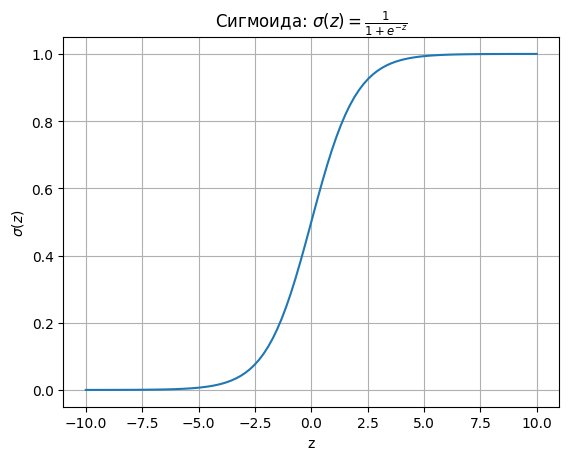

In [4]:
import matplotlib.pyplot as plt
import numpy as np

z = np.linspace(-10, 10, 100)
sigma_z = 1 / (1 + np.exp(-z))
plt.plot(z, sigma_z)
plt.title(r"Сигмоида: $\sigma(z) = \frac{1}{1 + e^{-z}}$")
plt.xlabel("z")
plt.ylabel(r"$\sigma(z)$")
plt.grid()
plt.show()

Поэтому мы можем интерпретировать $\alpha(x) = \sigma(\langle w, x \rangle)$ как вероятность:

$$P(y = 1 | x, w) = \sigma(\langle w, x \rangle)$$

$$P(y = 0 | x, w) = 1 - \sigma(\langle w, x \rangle)$$

Или же компактно:

$$P(y | x, w) = \sigma(\langle w, x \rangle)^y \cdot (1 - \sigma(\langle w, x \rangle))^{1 - y}$$

Перейдем к функциям потерь в логистической регрессии.

Мы хотим найти такие веса $w$, которые будут делать нашу обучающую выборку максимально правдоподобной. Предполагая независимость объектов, мы можем записать общую вероятность обучающей выборки как произведение вероятностей каждого объекта:

$$L(w) = \prod_{i = 1}^l P(y_i | x_i, w) = \prod_{i = 1}^l \sigma(\langle w, x_i \rangle)^{y_i} \cdot (1 - \sigma(\langle w, x_i \rangle))^{1 - y_i}$$

Однако, максимизировать произведение может быть неудобно, поэтому вспомним про чудесные свойства логарифма:

- Логарифм монотонно возрастает: если $a > b > 0$, то $\log(a) > \log(b)$, поэтому $\arg \max f(x) = \arg \max \log(f(x))$
- Логарифм произведения равен сумме логарифмов: $\log(a \cdot b) = \log(a) + \log(b)$

Поэтому применим логарифм:

$$\log L(w) = \log \left( \prod_{i = 1}^l P(y_i | x_i, w) \right) = \sum_{i = 1}^l \log P(y_i | x_i, w) = \sum_{i = 1}^l \log \left( \sigma(\langle w, x_i \rangle)^{y_i} \cdot (1 - \sigma(\langle w, x_i \rangle))^{1 - y_i} \right) =$$

$$\sum_{i = 1}^l \left[ y_i \log \sigma(\langle w, x_i \rangle) + (1 - y_i) \log (1 - \sigma(\langle w, x_i \rangle)) \right]$$

Но в машинном обучении принято минимизировать функции потерь, поэтому добавим минус:

$$Q(w) = - \log L(w) = - \sum_{i = 1}^l \left[ y_i \log \sigma(\langle w, x_i \rangle) + (1 - y_i) \log (1 - \sigma(\langle w, x_i \rangle)) \right]$$

По сути мы получили функцию потерь, которая называется **логистической потерей** или **кросс-энтропийной потерей**.

## Cross-Entropy Loss

Для одного объекта:

$$L(y, a) = - \left[ y \log a + (1 - y) \log (1 - a) \right],$$

где $a = \sigma(\langle w, x \rangle) \in (0, 1),$ $y \in \{0, 1\}$.

Для всей выборки:
$$Q(w) = CE(\alpha, X) = - \sum_{i = 1}^l \left[ y_i \log \sigma(\langle w, x_i \rangle) + (1 - y_i) \log (1 - \sigma(\langle w, x_i \rangle)) \right]$$

Посмотрим на график функции потерь для одного объекта:

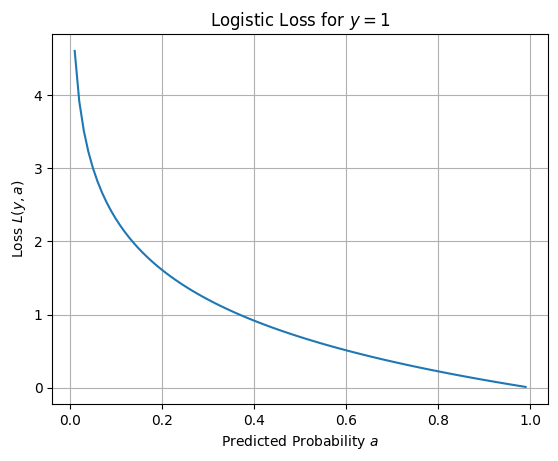

In [6]:
import numpy as np
import matplotlib.pyplot as plt
a = np.linspace(0.01, 0.99, 100)
loss_y1 = - np.log(a)

plt.plot(a, loss_y1)
plt.title(r"Logistic Loss for $y=1$")
plt.xlabel(r"Predicted Probability $a$")
plt.ylabel(r"Loss $L(y, a)$")
plt.grid()
plt.show()

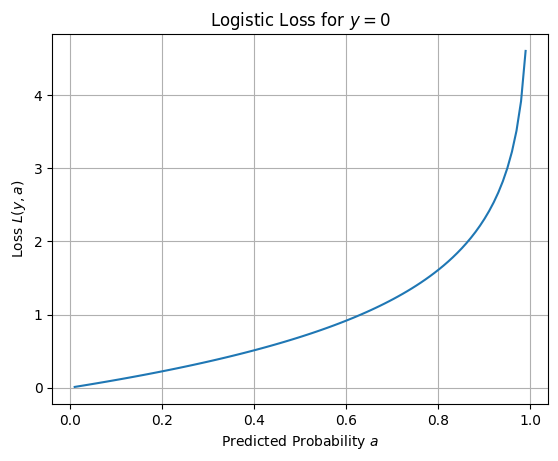

In [9]:
import numpy as np
import matplotlib.pyplot as plt
a = np.linspace(0.01, 0.99, 100)
loss_y0 = - np.log(1 - a)

plt.plot(a, loss_y0)
plt.title(r"Logistic Loss for $y=0$")
plt.xlabel(r"Predicted Probability $a$")
plt.ylabel(r"Loss $L(y, a)$")
plt.grid()
plt.show()

Как мы видим, когда модель уверена в своем предсказании (т.е. $a$ близко к 1 для $y=1$ или $a$ близко к 0 для $y=0$), функция потерь стремится к 0. Однако, когда модель ошибается (т.е. $a$ близко к 0 для $y=1$ или $a$ близко к 1 для $y=0$), функция потерь становится очень большой.

### Теперь найдем градиент функции потерь.

Рассмотрим один объект: (после просто суммируем по всем объектам)

$$L = - \left[ y \log \sigma(\langle w, x \rangle) + (1 - y) \log (1 - \sigma(\langle w, x \rangle)) \right]$$

Поэтому:

$$\frac{\partial L}{\partial w_j} = \frac{\partial L}{\partial \sigma} \cdot \frac{\partial \sigma}{\partial z} \cdot \frac{\partial z}{\partial w_j},$$

где $z = \langle w, x \rangle$.

1. Найдем $\frac{\partial L}{\partial \sigma}$:

$$\frac{\partial L}{\partial \sigma} = - \left[ \frac{y}{\sigma} - \frac{1 - y}{1 - \sigma} \right] = \frac{\sigma - y}{\sigma(1 - \sigma)}$$

2. Найдем $\frac{\partial \sigma}{\partial z}$:

$$\frac{\partial \sigma}{\partial z} = \sigma(1 - \sigma)$$

3. Найдем $\frac{\partial z}{\partial w_j}$:

$$\frac{\partial z}{\partial w_j} = x_j$$

По итогу получим:

$$\frac{\partial L}{\partial w_j} = \frac{\sigma - y}{\sigma(1 - \sigma)} \cdot \sigma(1 - \sigma) \cdot x_j = (\sigma - y) x_j$$

Поэтому для всей выборки градиент будет выглядеть так:

$$\nabla Q = \sum_{i = 1}^l (\sigma(\langle w, x_i \rangle) - y_i) x_i$$

В матричной форме:

$$\nabla Q = X^T (\sigma(X w) - y)$$